In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Forecasting the price of gold in the future based on past data of 2 decades using SARIMA

In [2]:
#Importing libraries and ARIMA models
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('GoldUP.csv',index_col='Date')
#df.index.freq = 'MS'
print(len(df))
df.head()

239


,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
Date,,,,,,,
01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [3]:
df1=df

In [4]:
df1

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
Date,,,,,,,
01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...
01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39


Setting date as the index of the dataframe in the correct format of YYYY-MM-DD as read by the pandas

In [5]:
df1['date']=df1.index

In [6]:
df1

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index,date
Date,,,,,,,,
01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65,01-10-2000
01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24,01-11-2000
01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56,01-12-2000
01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52,01-01-2001
01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01,01-02-2001
...,...,...,...,...,...,...,...,...
01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57,01-04-2020
01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34,01-05-2020
01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39,01-06-2020


In [7]:
df1.index=pd.to_datetime(df1['date'],format='%d-%m-%Y')

In [8]:
df1.index

DatetimeIndex(['2000-10-01', '2000-11-01', '2000-12-01', '2001-01-01',
               '2001-02-01', '2001-03-01', '2001-04-01', '2001-05-01',
               '2001-06-01', '2001-07-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='date', length=239, freq=None)

In [9]:
df2=df1.drop('date',axis=1)

In [10]:
df3=df2

In [11]:
df3.index.freq='MS'

Checking for null values

In [12]:
df3.isnull().sum()

Gold_Price       0
Crude_Oil        0
Interest_Rate    0
USD_INR          0
Sensex           0
CPI              0
USD_Index        0
dtype: int64

Checking the change in Gold Price over the period of 20 years

<AxesSubplot:xlabel='date'>

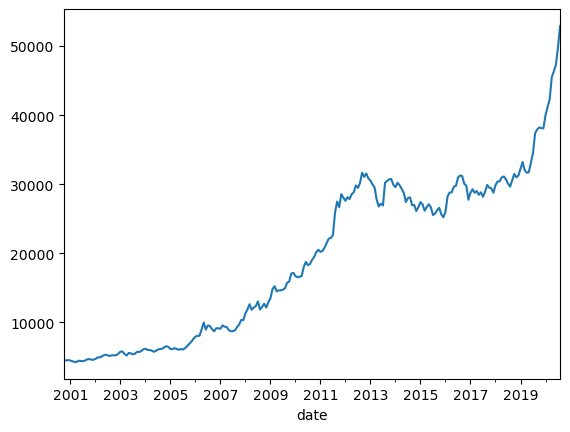

In [13]:
df3['Gold_Price'].plot()

It can be observed that the Gold price has increased over time with slight dip and price fluctuation from year 2014 to 2017. The price increased initially gradually and then exponentially. It drops in 2013 due to change in due to change in monetary policies to stimulate economic growth and drop in demand of gold for it being considered an outdated luxury metal.

Therefore, we choose multiplicative method to understand the seasonality and trend in the data

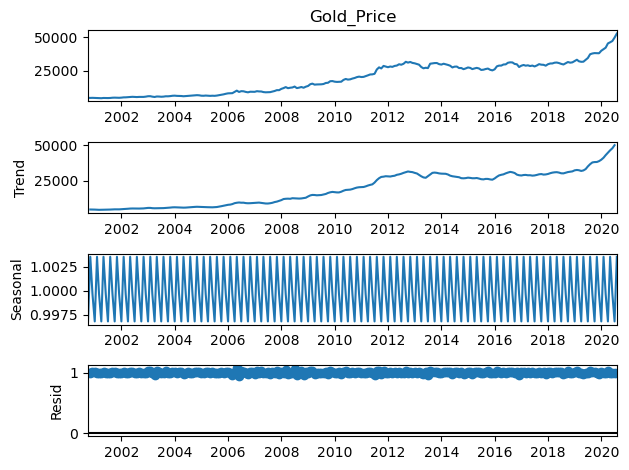

In [14]:
seasonal_decompose(df3['Gold_Price'],model='multiplicative',period=3).plot();

Gold price follows an increasing trend and quarterly seasonality pattern, repeating every few months and then every year as well.

Since the data is not stationary and there is clear indication of seasonality we will perform SARIMA instead of ARIMA

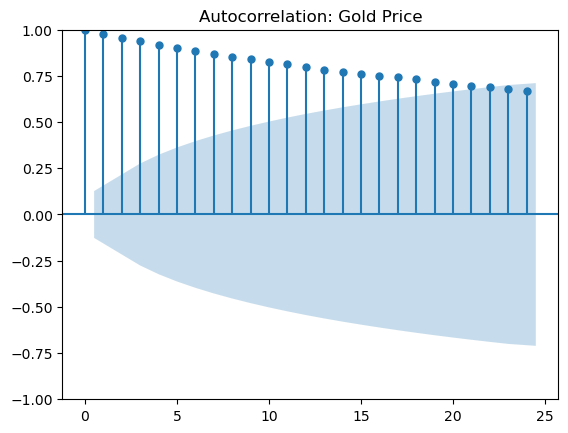

In [15]:
title='Autocorrelation: Gold Price'
lags=24
ax=plot_acf(df3['Gold_Price'],lags=lags,title=title);


From the figure we can be deduce Moving Average order i.e. p as 1 from significant spike at 1st lag

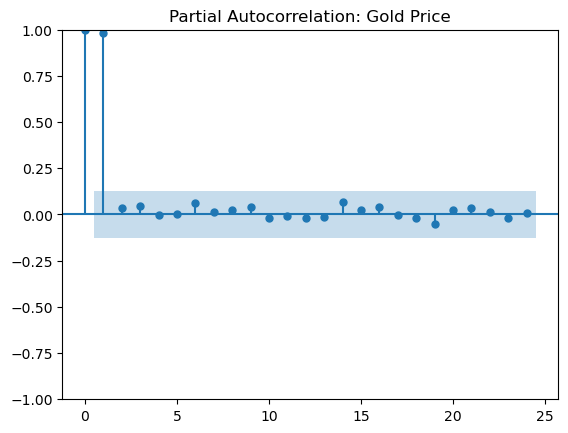

In [16]:
title='Partial Autocorrelation: Gold Price'
lags=24
ax=plot_pacf(df3['Gold_Price'],lags=lags,title=title);


From the figure we can be deduce AutoRegression order i.e. p as 0 due to the sharp drop at 1st lag

# AUTO ARIMA

Using auto arima function to deduce optimal values of ARIMA orders

In [17]:
model= auto_arima(df3['Gold_Price'], start_p= 1, start_q=1,seasonal=True,m=3 )
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  239
Model:             SARIMAX(0, 2, 2)x(2, 0, 2, 3)   Log Likelihood               -1893.798
Date:                           Thu, 27 Jul 2023   AIC                           3801.597
Time:                                   17:58:33   BIC                           3825.873
Sample:                               10-01-2000   HQIC                          3811.381
                                    - 08-01-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7941      0.070    -11.393      0.000      -0.931      -0.658
ma.L2         -0.1155      0.078     -1.481      0.139      -0.268       0.037
ar.S.L3       -0.0450      0.113     -0.398      0.690      -0.266       0.176
ar.S.L6        0.9141      0.115      7.929      0.000       0.688       1.140
ma.S.L3        0.0838      0.144      0.583      0.560      -0.198       0.366
ma.S.L6       -0.8161      0.158     -5.170      0.000      -1.125      -0.507
sigma2      5.022e+05   3.55e+04     14.162      0.000    4.33e+05    5.72e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               119.42
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               7.83   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Great! This provides ARIMA order of (0,2,2) and seasonal order of (2,0,2,3). Now we can train our model using these parameters

# Split data into train and test sets

In [18]:
train=df3[:-12]
#Creating a test set of 12 months since we want to forecast the value 1 year in the future
test=df3[-12:]

In [19]:
model_1= SARIMAX(train['Gold_Price'],order=(0, 2, 2),seasonal_order=(2, 0, 2, 3))
results_1=model_1.fit()
results_1.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91656D+00    |proj g|=  8.21872D-02

At iterate    5    f=  7.90409D+00    |proj g|=  3.12893D-02

At iterate   10    f=  7.89763D+00    |proj g|=  8.88657D-03

At iterate   15    f=  7.89052D+00    |proj g|=  3.70289D-02

At iterate   20    f=  7.88735D+00    |proj g|=  5.15774D-03

At iterate   25    f=  7.88625D+00    |proj g|=  4.44628D-03

At iterate   30    f=  7.88591D+00    |proj g|=  5.70114D-04

At iterate   35    f=  7.88590D+00    |proj g|=  2.63531D-03

At iterate   40    f=  7.88499D+00    |proj g|=  2.66470D-02

At iterate   45    f=  7.87989D+00    |proj g|=  4.39900D-03

At iterate   50    f=  7.87858D+00    |proj g|=  2.73544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Gold_Price   No. Observations:                  227
Model:             SARIMAX(0, 2, 2)x(2, 0, 2, 3)   Log Likelihood               -1788.439
Date:                           Thu, 27 Jul 2023   AIC                           3590.877
Time:                                   17:58:33   BIC                           3614.790
Sample:                               10-01-2000   HQIC                          3600.529
                                    - 08-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8588      0.741     -1.159      0.247      -2.312       0.594
ma.L2         -0.1409      0.136     -1.034      0.301      -0.408       0.126
ar.S.L3       -0.0887      0.134     -0.663      0.507      -0.351       0.174
ar.S.L6        0.8927      0.139      6.401      0.000       0.619       1.166
ma.S.L3        0.1345      0.157      0.855      0.393      -0.174       0.443
ma.S.L6       -0.8235      0.175     -4.713      0.000      -1.166      -0.481
sigma2      4.638e+05   3.39e+05      1.369      0.171      -2e+05    1.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               146.76
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               8.80   Skew:                             0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.2e+14. Standard errors may be unstable.
"""

In [20]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions_1 = results_1.predict(start=start, end=end, dynamic=False, typ='levels')

In [21]:
# Compare predictions to expected values
for i in range(len(predictions_1)):
    print(f"predicted={predictions_1[i]:<11.10}, expected={test['Gold_Price'][i]}")

predicted=37878.54282, expected=37927
predicted=38076.62669, expected=38214
predicted=38262.31637, expected=38122
predicted=38365.67694, expected=38092
predicted=38668.33639, expected=39984
predicted=39100.8902 , expected=41195
predicted=39307.91665, expected=42285
predicted=39489.45604, expected=45504
predicted=39648.40536, expected=46343
predicted=39753.87258, expected=47315
predicted=40039.51238, expected=49878
predicted=40443.11133, expected=52917


<AxesSubplot:title={'center':'Monthly Gold Price'}, xlabel='date'>

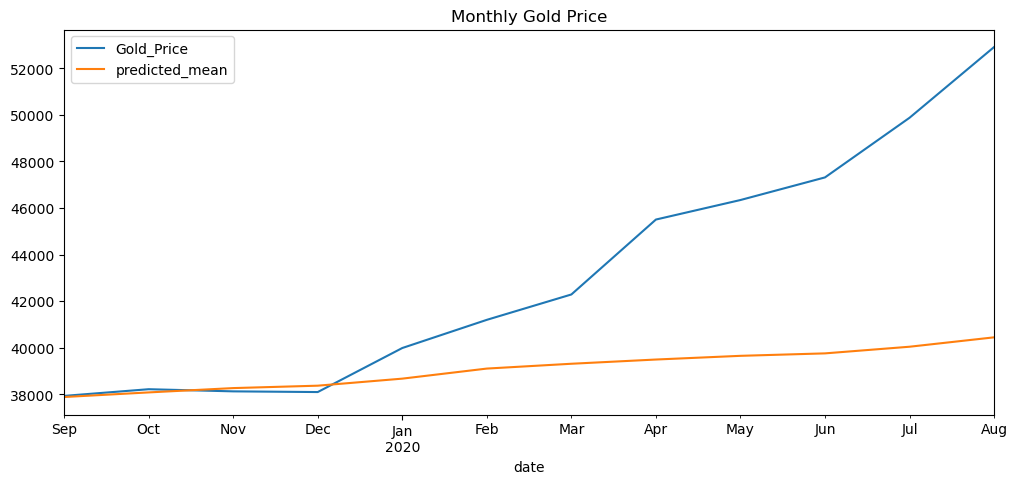

In [22]:
title='Monthly Gold Price'

ax=test['Gold_Price'].plot(legend=True,figsize=(12,5),title=title)
predictions_1.plot(legend=True)

The predicted values are a deviated from the original values by a significant amount and does not even follow the trend. Therefore, we will conduct SARIMAX i.e. Seasonal ARIMA with exogneous variables.

# Evaluating the Model

In [23]:
def model_evaluation(predicted, actual):
    mape = np.mean(np.abs(predicted - actual)/np.abs(actual))  # MAPE
    mse = mean_squared_error(actual,predicted)
    rmse_error = rmse(actual, predicted)
            
    return({'mape':mape, 'mse':mse, 
             'rmse':rmse_error})

model_evaluation(predictions_1, test['Gold_Price'])

{'mape': 0.08660801173974626,
 'mse': 33804318.38027735,
 'rmse': 5814.148121632037}

Mean Absolute Percentage Error (MAPE) value of 8.6 % suggests that, on average, the model forecast is 91.4% accurate

Let's see if we can improve the accuracy of our model and forecasted values by introducing exogenous variables.

# Feature Engineering

<AxesSubplot:>

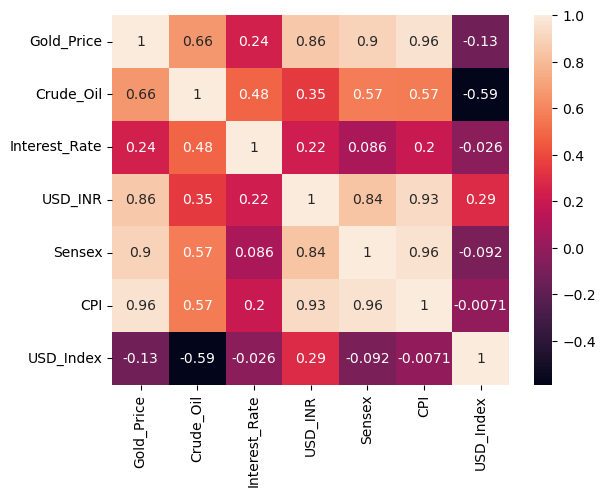

In [24]:
sns.heatmap(df2.corr(),annot=True)

As we can see price of gold is highly correlated with:
1. Crude oil price since crude oil supplies fuel for gold mining and transportation. 
2. USD_INR conversion rate, since gold is imported/traded in US dollars. 
3. Sensex, as it reflects the overall sentiments of the Indian stock market.

Therefore, we can use above mentioned attributes as exogenous variables for SARIMAX model

In [25]:
model_exog= SARIMAX(train['Gold_Price'],exog= train[['Crude_Oil','USD_INR','Sensex']],order=(0, 2, 2),seasonal_order=(2, 0, 2, 3),enforce_invertibility= False)
results_exog=model_exog.fit()
results_exog.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87645D+00    |proj g|=  1.82570D-01

At iterate    5    f=  7.85104D+00    |proj g|=  6.85336D-03

At iterate   10    f=  7.85078D+00    |proj g|=  5.15068D-03

At iterate   15    f=  7.84849D+00    |proj g|=  2.81827D-02

At iterate   20    f=  7.84664D+00    |proj g|=  7.72152D-03


 This problem is unconstrained.



At iterate   25    f=  7.84650D+00    |proj g|=  7.48091D-04

At iterate   30    f=  7.84637D+00    |proj g|=  1.24627D-02

At iterate   35    f=  7.84410D+00    |proj g|=  2.09436D-02

At iterate   40    f=  7.84346D+00    |proj g|=  4.95145D-03

At iterate   45    f=  7.84326D+00    |proj g|=  4.34222D-03

At iterate   50    f=  7.84319D+00    |proj g|=  5.51436D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     65      1     0     0   5.514D-03   7.843D+00
  F =   7.8431856682887355     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Gold_Price   No. Observations:                  227
Model:             SARIMAX(0, 2, 2)x(2, 0, 2, 3)   Log Likelihood               -1780.403
Date:                           Thu, 27 Jul 2023   AIC                           3580.806
Time:                                   17:58:34   BIC                           3614.967
Sample:                               10-01-2000   HQIC                          3594.594
                                    - 08-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Crude_Oil      0.1560      0.174      0.896      0.370      -0.185       0.497
USD_INR      194.0338     50.148      3.869      0.000      95.746     292.322
Sensex        -0.0801      0.053     -1.519      0.129      -0.183       0.023
ma.L1         -0.8473      0.078    -10.844      0.000      -1.000      -0.694
ma.L2         -0.1454      0.079     -1.837      0.066      -0.300       0.010
ar.S.L3       -0.0837      0.199     -0.421      0.674      -0.474       0.306
ar.S.L6        0.8687      0.216      4.023      0.000       0.445       1.292
ma.S.L3        0.1109      0.223      0.498      0.618      -0.326       0.548
ma.S.L6       -0.7980      0.256     -3.111      0.002      -1.301      -0.295
sigma2      5.052e+05    4.7e+04     10.738      0.000    4.13e+05    5.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                49.50
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               6.77   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Crude_Oil','USD_INR','Sensex']]  # requires two brackets to yield a shape of (35,1)
predictions_exog = results_exog.predict(start=start, end=end, exog=exog_forecast,typ='levels')

<AxesSubplot:title={'center':'Monthly Gold Price'}, xlabel='date'>

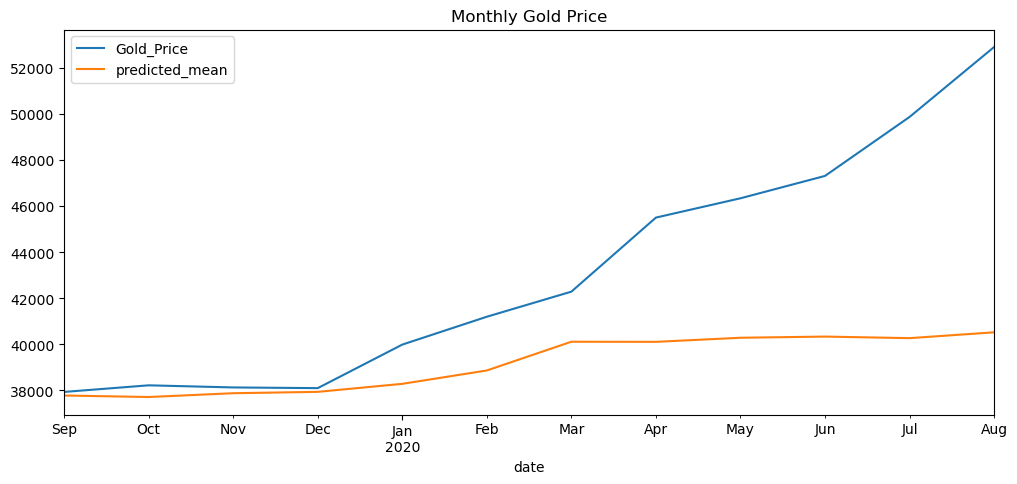

In [27]:
title='Monthly Gold Price'

ax=test['Gold_Price'].plot(legend=True,figsize=(12,5),title=title)
predictions_exog.plot(legend=True)

It can be noticed that forecasted values are still deviated from the actual data, however, the forecasted values does follow thw trend of the actual data.

For better understanding of the model's performace we can evaluate our model.

In [28]:
model_evaluation(predictions_exog,test['Gold_Price'])

{'mape': 0.0835976712387616,
 'mse': 31191574.86888285,
 'rmse': 5584.941796373786}

MAPE value of 8.3% suggest that the model's accuracy has imporved by approximately 0.4%.

# FORECASTING IN THE FUTURE

The accuracy of our model increased by a very small difference. And since we do not have value of exogenous variables for future forecasting we can use SARIMA model for forecasting.

In [29]:
start= len(df2)
end= len(df2)+10

In [30]:
model= SARIMAX(df2['Gold_Price'],order= (0,2,2), seasonal_order=(2,0,2,3))
results= model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94975D+00    |proj g|=  5.06807D-02

At iterate    5    f=  7.94661D+00    |proj g|=  1.63429D-02

At iterate   10    f=  7.93980D+00    |proj g|=  7.18997D-03

At iterate   15    f=  7.93703D+00    |proj g|=  1.31742D-02

At iterate   20    f=  7.93447D+00    |proj g|=  2.41265D-03

At iterate   25    f=  7.92918D+00    |proj g|=  4.12089D-03


 This problem is unconstrained.



At iterate   30    f=  7.92903D+00    |proj g|=  1.78261D-04

At iterate   35    f=  7.92900D+00    |proj g|=  1.96406D-03

At iterate   40    f=  7.92854D+00    |proj g|=  2.18018D-03

At iterate   45    f=  7.92388D+00    |proj g|=  3.61925D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     56      1     0     0   1.175D-04   7.924D+00
  F =   7.9238421269794639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Gold_Price   No. Observations:                  239
Model:             SARIMAX(0, 2, 2)x(2, 0, 2, 3)   Log Likelihood               -1893.798
Date:                           Thu, 27 Jul 2023   AIC                           3801.597
Time:                                   17:58:35   BIC                           3825.873
Sample:                               10-01-2000   HQIC                          3811.381
                                    - 08-01-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7941      0.070    -11.393      0.000      -0.931      -0.658
ma.L2         -0.1155      0.078     -1.481      0.139      -0.268       0.037
ar.S.L3       -0.0450      0.113     -0.398      0.690      -0.266       0.176
ar.S.L6        0.9141      0.115      7.929      0.000       0.688       1.140
ma.S.L3        0.0838      0.144      0.583      0.560      -0.198       0.366
ma.S.L6       -0.8161      0.158     -5.170      0.000      -1.125      -0.507
sigma2      5.022e+05   3.55e+04     14.162      0.000    4.33e+05    5.72e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               119.42
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               7.83   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
predictions = results.predict(start=start, end=end,dynamic=True,typ='levels')

<AxesSubplot:title={'center':'Monthly Gold Price'}, xlabel='date'>

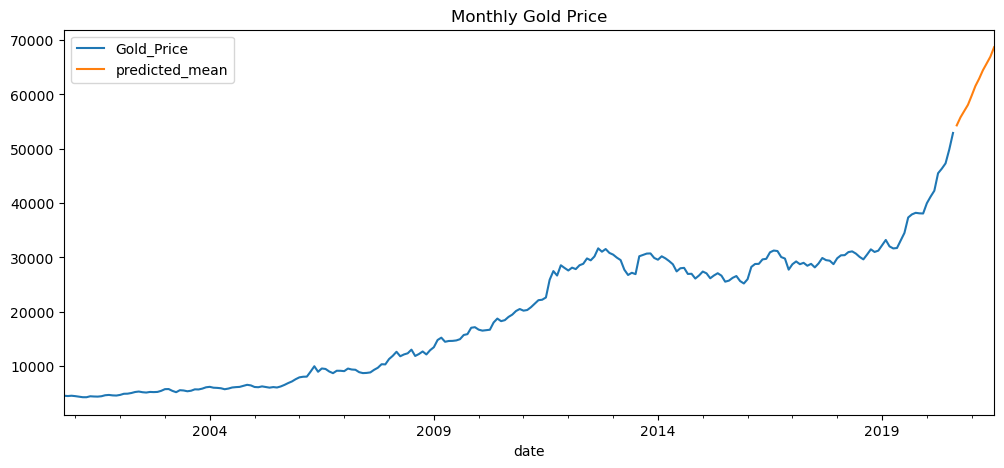

In [32]:
title='Monthly Gold Price'

ax=df2['Gold_Price'].plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)

The above plot shows the forecasted price of gold 10 months into the future.

# Conclusion

From the data over the past 2 decades and forecasting it is evident that the price of gold has increased over time even though there were fluctuations. The price has dropped in some months over the course, however, it rises again in the future months. For someone wishing to make long term investment, gold can serve as an asset and could be invested in.